# Titanic Data Exploration
### *Andrea Cano*
***

## Introduction

The following graphs and matrices show the collected data based on the Tragedy of the Titanic. The data will be preprocessed and explored to provide physical representations of the information provided.

***
## Loading Data

The first step is importing the necessary libraries and collect the respective csv file containing the raw data.
In my example I have two Dataframes one that is unchanged with all columns(dat) and one that has all float data(df)

In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformMixin

csv = pd.read_csv("C:/Users/Andrea/Downloads/train.csv")


#creating non-null
dat = pd.DataFrame(csv)
df = pd.DataFrame(dat[["PassengerId","Survived","Pclass","Age","SibSp","Fare"]])


***
## Preprocessing

In this section we will rid the data of any null(NaN) values within the data specifically  for the 'df' dataframe and the 'Age' and 'Fare' columns in the 'dat' dataframe. The strategy used is to get the median of the respective columns and use that as a placeholder for any NaN and also scale the data using z-score normalization. This will in turn produce a numpy matrix as shown below which will be made into a new dataframe.

In [106]:
imputer = Imputer(strategy="median")
imputer.fit(df)
x=imputer.transform(df)
df=pd.DataFrame(x,columns=df.columns)


pipe = Pipeline([
 ("remove_nas", Imputer(strategy="median")),
 ("z-scaling", StandardScaler())
 ])
x = pipe.fit_transform(df[["SibSp","Fare"]])

new=pd.DataFrame(x)
new.columns = ["SibSp","Fare"]
pipe.fit_transform(df[["SibSp","Fare"]])

array([[ 0.43279337, -0.50244517],
       [ 0.43279337,  0.78684529],
       [-0.4745452 , -0.48885426],
       ...,
       [ 0.43279337, -0.17626324],
       [-0.4745452 , -0.04438104],
       [-0.4745452 , -0.49237783]])

* In this section there may be a time where having the Sex as a Numeric rather than Categorical value could come in handy. So to make that change we can create dummies, in this example I just added them as additional columns for the time being. 

In [107]:
dummy = pd.get_dummies(dat["Sex"])
dat = pd.concat([dat,dummy], axis=1)
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


***
## Data Exploration

Now we are able to explore the data! 

* Starting with a simple countplot, we see the general ratio of survivors of the Titanic wreck. In this plot 0 represents those who did not survive while 1 represents those who did.

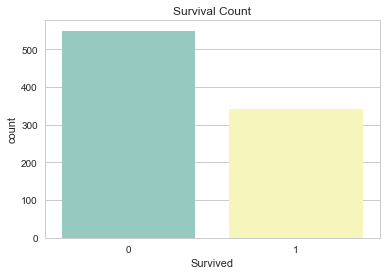

In [117]:
sns.set(style="whitegrid")
sns.countplot(x="Survived",data =dat, palette="Set3")
plt.title("Survival Count");


* Next is a histogram showing the Ages of the passengers. The density curve shows an extreme jump in the 30's range.

C:\Users\Andrea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


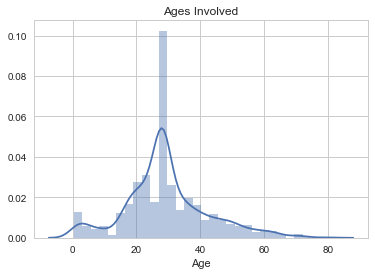

In [116]:
sns.distplot(df['Age'],hist=True)
plt.title("Ages Involved");

* This barplot shows the Survival probability based on Age and Sex; where again, Survived is 1 and 0 is where they did not. There are not that large of differences, tough it seems that men over 25 most likely did not make it.

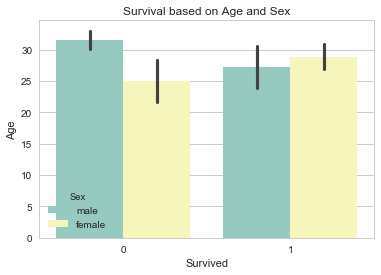

In [114]:
sns.barplot(x= "Survived", y="Age", hue ="Sex",data = dat, palette="Set3")
plt.title("Survival based on Age and Sex");

* This plot shows the passengers classes and sex. Each class had more males than females where 3rd class was extremely male dominated. I am assuming this is because of the workers aboard the Titanic were mostly male.

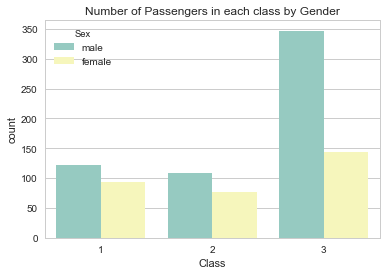

In [113]:
sns.countplot("Pclass", data=dat, hue="Sex",palette="Set3")
plt.title("Number of Passengers in each class by Gender")
plt.xlabel("Class");

* Lastly, here is a violin plot that represents the Age and Gender of the Passengers. The colors then represent who lived and who did not. It is surprising to see that more females younger than 20 seemed to have not survived especially since more young men were able to survive since woman and children were to be boarded in the lifeboats first. This explains why the female violin is wider.

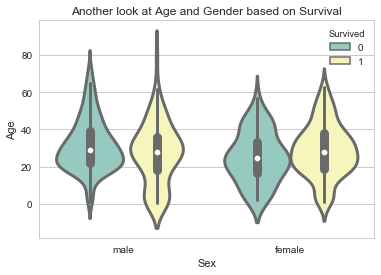

In [112]:
sns.violinplot(x="Sex", y = "Age", hue ="Survived", data=dat, inner="box", palette="Set3", cut=2, linewidth=3)
plt.title("Another look at Age and Gender based on Survival");